In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv ('Copy of SAT GPA - Sheet1.csv')

In [3]:
df

,*SAT Score*,*GPA (4.0 Scale)*
0,1600,4.00
1,1593,4.00
2,1587,4.00
3,1580,4.00
4,1573,4.00
...,...,...
142,653,0.62
143,647,0.48
144,640,0.31
145,633,0.15


In [4]:
X = df.iloc [:,:-1].values
y = df.iloc [:,-1].values


<Axes: >

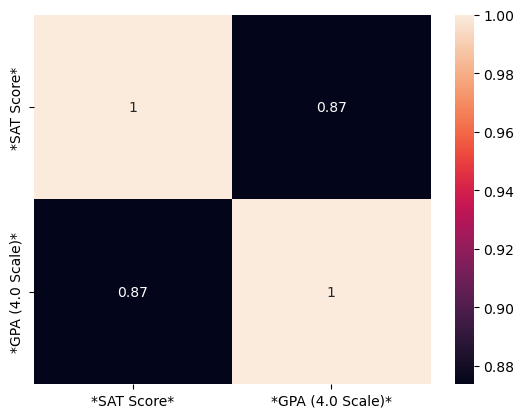

In [8]:
sns.heatmap (df.corr(),annot= True)

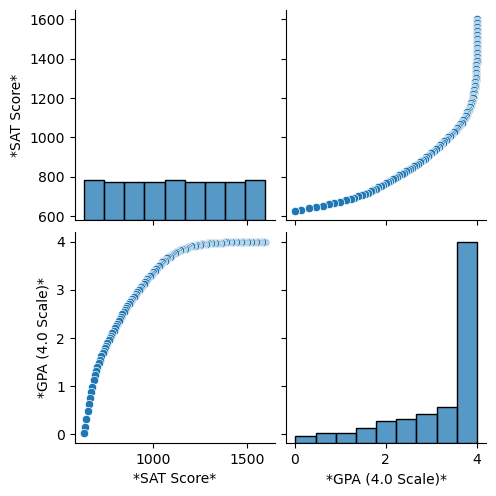

In [10]:
sns.pairplot (df)

In [5]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression ()
reg.fit (X_train, y_train)

LinearRegression()

In [13]:
pred= reg.predict (X_test)


In [14]:
df_result = pd.DataFrame ({'y_test': y_test, 'predictions': pred})

In [15]:
df_result

,y_test,predictions
0,2.00,2.149598
1,3.95,3.690612
2,1.12,1.877655
3,3.99,4.356406
4,2.92,2.587209
5,3.99,4.503318
6,3.71,3.168606
7,3.99,4.106342
8,3.61,3.065455
9,4.00,4.565834


In [16]:
from sklearn.metrics import r2_score, mean_squared_error
r2_score (y_test,pred)

0.7936060611647591

In [21]:
reg.predict ([[1500]])

array([4.44080196])

## Random Forest


In [6]:
from sklearn.ensemble import RandomForestRegressor

In [7]:
reg_rf = RandomForestRegressor(n_estimators=18)

In [8]:
reg_rf.fit (X_train,y_train)

RandomForestRegressor(n_estimators=18)

In [10]:
from sklearn.metrics import r2_score
pred_rf = reg_rf.predict (X_test)
r2_score (y_test,pred_rf)

0.9992952273002044

In [11]:
reg_rf.score (X_test,y_test)

0.9992952273002044

In [12]:
reg_rf.predict([[900]])

array([2.83222222])

In [15]:
 import joblib


In [16]:
from joblib import dump, load

In [17]:
dump (reg_rf,'model.joblib')

['model.joblib']

In [22]:
de = load ('model.joblib')
de.predict ([[1500]])

array([3.99])

In [38]:
from sklearn.preprocessing import PolynomialFeatures

In [39]:
poly = PolynomialFeatures (degree=2,include_bias= False)

In [57]:
poly_X= poly.fit_transform (X_train)

In [58]:
reg_pr = LinearRegression ()
reg_pr.fit (poly_X,y_train)

LinearRegression()

In [59]:
pred_pr = reg_pr.predict (poly.transform (X_test))
r2_score (y_test,pred_pr)

0.9878346964484136

In [67]:
reg_pr.predict([[1900]])

ValueError: X has 1 features, but LinearRegression is expecting 2 features as input.